In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.lines as mlines #범례 그리기 위한 라이브러리
from glob import glob
from detecta import detect_cusum
from tnorma import tnorma #pip install tnorma
from detecta import detect_onset
from detecta import detect_peaks
import os
from sklearn.metrics import mean_squared_error
import spm1d

In [2]:
file_list = sorted(glob('data/*.csv'))
len(file_list)

81

In [3]:
a = pd.read_csv(file_list[0], skiprows=2)
a = a.iloc[2:, :]
a

,Unnamed: 0,Unnamed: 1,S01:CentreOfMass,Unnamed: 3,Unnamed: 4,S01:CentreOfMassFloor,Unnamed: 6,Unnamed: 7,S01:HED,Unnamed: 9,...,S01:TRX,Unnamed: 393,Unnamed: 394,Unnamed: 395,Unnamed: 396,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400,Unnamed: 401
2,628,0,240.393,-956.582,973.519,240.393,-956.582,0,1.95529,-3.0827,...,120.774,134.336,2.39904,237.12,-882.785,1356.57,200.574,200.574,200.574,NaN
3,629,0,240.524,-942.456,972.733,240.524,-942.456,0,1.82064,-3.03535,...,120.146,134.796,2.26587,235.974,-869.143,1355.31,200.412,200.412,200.412,NaN
4,630,0,240.566,-928.224,971.844,240.566,-928.224,0,1.69849,-2.99973,...,119.555,135.223,2.13995,234.752,-855.304,1353.89,200.282,200.282,200.282,NaN
5,631,0,240.519,-913.886,970.849,240.519,-913.886,0,1.58896,-2.97597,...,119.002,135.617,2.02176,233.455,-841.267,1352.3,200.18,200.18,200.18,NaN
6,632,0,240.382,-899.441,969.746,240.382,-899.441,0,1.49201,-2.96413,...,118.488,135.977,1.91271,232.084,-827.03,1350.57,200.103,200.103,200.103,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,865,0,252.756,2690.82,979.007,252.756,2690.82,0,-6.77419,6.42021,...,118.838,136.029,0.574766,248.448,2762.06,1359.77,200.952,200.952,200.952,NaN
240,866,0,252.342,2702.58,978.448,252.342,2702.58,0,-6.96547,6.47783,...,118.373,136.33,0.643299,246.746,2773.4,1358.89,200.919,200.919,200.919,NaN
241,867,0,251.815,2714.35,977.806,251.815,2714.35,0,-7.13516,6.52275,...,117.968,136.609,0.753104,244.916,2784.79,1357.92,200.888,200.888,200.888,NaN
242,868,0,251.171,2726.12,977.079,251.171,2726.12,0,-7.28342,6.55477,...,117.623,136.868,0.906006,242.957,2796.23,1356.85,200.858,200.858,200.858,NaN


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


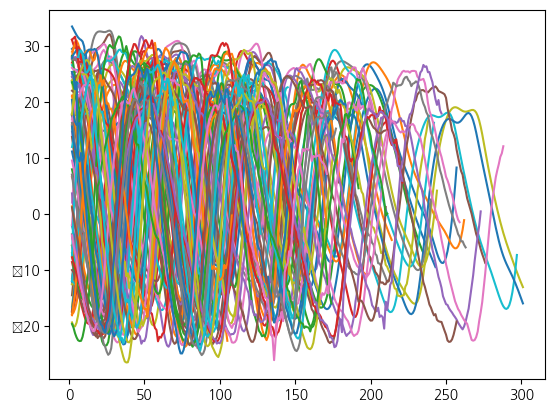

In [22]:
# Rhip_x

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:, :]
    rh_cols = [col for col in a.columns if col.endswith("RHipAngles")]  # column 찾기

    for col in rh_cols:
        loc = a.columns.get_loc(col)

    rhip = a.iloc[:300, loc:loc+3]  # 300프레임 가져오고 RHipAnglesdml x,y,z 가져옴
    rhip = rhip.astype('float')
    rhip_x = rhip.iloc[:,0]

    plt.plot(rhip_x, label = rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


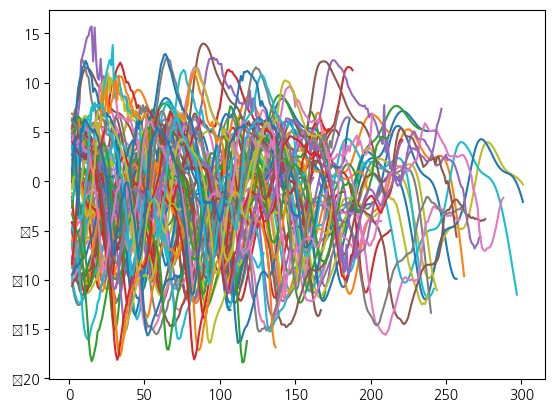

In [24]:
# Rhip_y

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RHipAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    
    rhip = a.iloc[:300,loc:loc+3]
    
    rhip = rhip.astype('float')
    
    rhip_y = rhip.iloc[:,1]
    
    plt.plot(rhip_y, label=rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


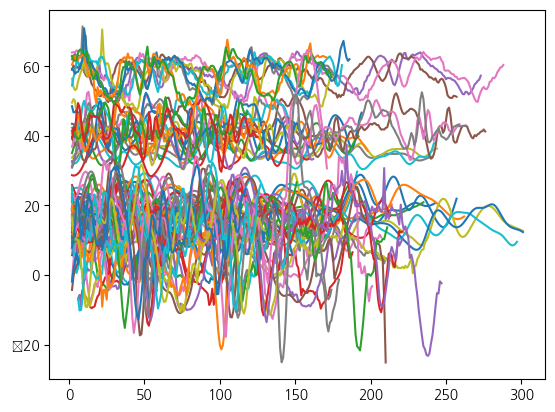

In [26]:
# Rhip_z

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RHipAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    
    rhip = a.iloc[:300,loc:loc+3]
    
    rhip = rhip.astype('float')
    
    rhip_z = rhip.iloc[:,2]
    
    plt.plot(rhip_z, label=rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


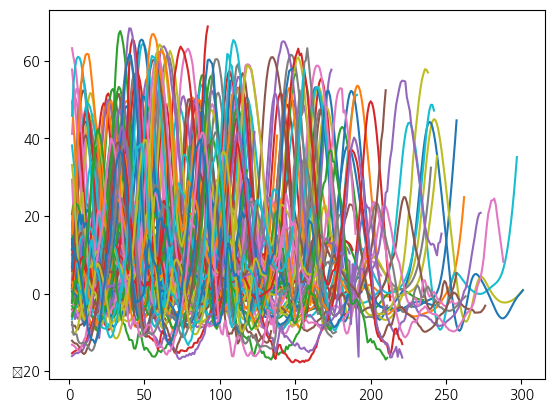

In [27]:
# Rknee x

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RKneeAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    

    rhip = a.iloc[:300,loc:loc+3]
    
    rhip = rhip.astype('float')
    
    rhip_x = rhip.iloc[:,0]

    
    plt.plot(rhip_x, label=rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


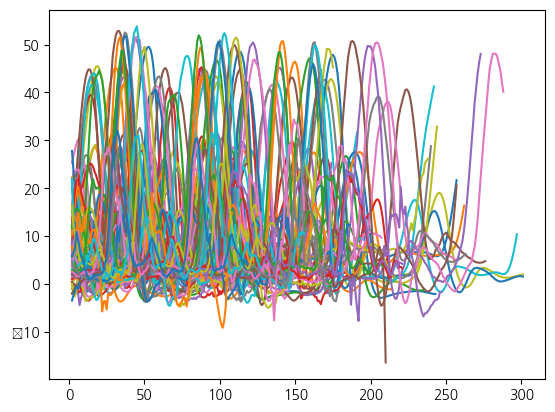

In [28]:
# Rknee y

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RKneeAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    

    rhip = a.iloc[:300,loc:loc+3]
    
    rhip = rhip.astype('float')
    
    rhip_x = rhip.iloc[:,1]

    
    plt.plot(rhip_x, label=rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


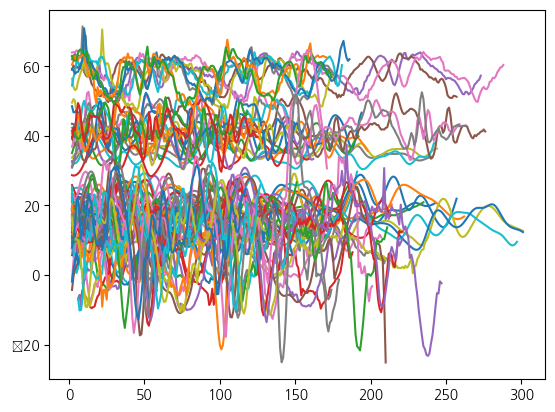

In [30]:
# RKnee z

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RHipAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    
    rhip = a.iloc[:300,loc:loc+3]
    
    rhip = rhip.astype('float')
    
    rhip_y = rhip.iloc[:,2]
    
    plt.plot(rhip_y, label=rh_cols[:3])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


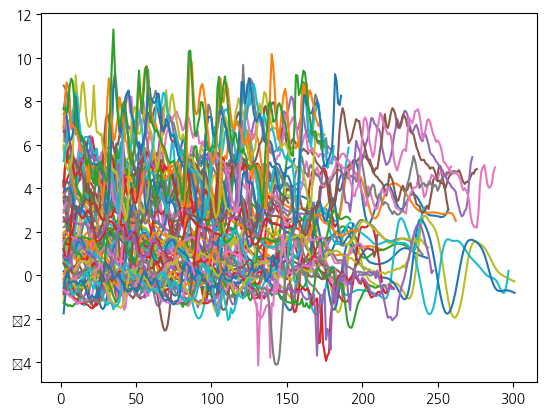

In [31]:
# RAnkle

for i in file_list:
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RAnkleAngles")]

    for col in rh_cols:
        loc = a.columns.get_loc(col)
    

    rhip = a.iloc[:300,loc+1]
    
    rhip = rhip.astype('float')

    plt.plot(rhip, label=rh_cols[:3])

### 보행 이벤트 설정

data\S01_GAIT_001.csv
0      -317.2635
1      -319.9445
2      -322.0280
3      -323.5225
4      -324.4310
         ...    
237    1501.6890
238    1499.9720
239    1498.3430
240    1496.8050
241    1495.3560
Length: 242, dtype: float64


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


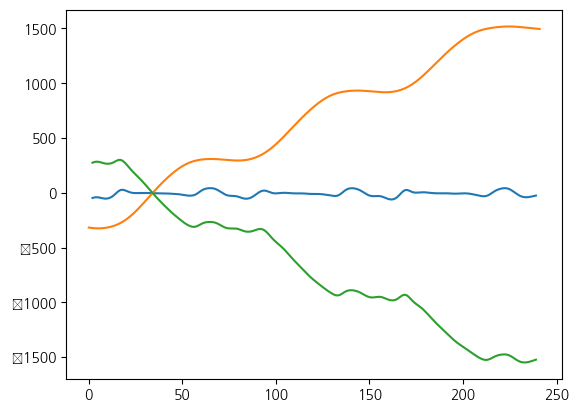

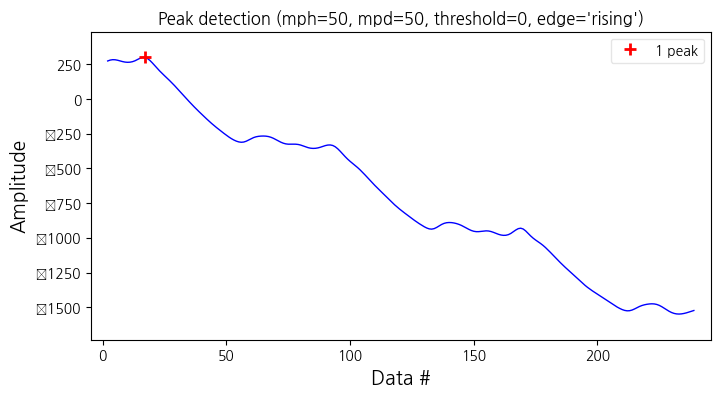

IndexError: index 1 is out of bounds for axis 0 with size 1

In [33]:
df_event = pd.DataFrame()
for i in file_list:
    a = pd.read_csv(i, skiprows=4) # 왼쪽 Heel의 Y좌표
    print(i)
    LHeel_Y = a.iloc[:,114]
    LHeel_Y = LHeel_Y.reset_index(drop=True)
    LHeel_Y.dropna(inplace=True)
    LHeel_Y = pd.to_numeric(LHeel_Y)
    plt.plot(LHeel_Y)

    LPSI = pd.to_numeric(a.iloc[:, 81])
    RPSI = pd.to_numeric(a.iloc[:, 78])
    SACR = (LPSI + RPSI)/2 # Sacrum 좌표 구하기
    print(SACR)
    plt.plot(SACR)

    LHSD = LHeel_Y - SACR # Heel Sacrum Distance
    plt.plot(LHSD)
    plt.legend = True
    plt.show()
    LH_event = detect_peaks(LHSD, mph=50, mpd=50, show=True)
    print(LH_event[0], LH_event[1])
    
    event = pd.DataFrame([LH_event[0], LH_event[1]])
    event = event.transpose()
    df_event = pd.concat([df_event, event], axis=0)
    
    print('----------------------------------------------------------------------------------------------------------')

In [34]:
df_event.columns = ['1st Heel Contact', '2nd Heel Contact']
df_event

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [35]:
file_path ='C:/Users/user/Desktop/EverEx Gait/Angle/'
file_list2 = sorted(glob(file_path + '*.csv'))
file_list2

[]

In [36]:
LHIP_dataset = pd.DataFrame()

for i, j in zip(file_list2, range(len(df_event))):
    a = pd.read_csv(i, skiprows=2)
    a = a.iloc[2:,:]
    rh_cols = [col for col in a.columns if col.endswith("RKneeAngles")]
    for col in rh_cols:
        loc = a.columns.get_loc(col)
        

    print(i)
    rhip = a.iloc[:,loc:loc+3]
    rhip = rhip.astype('float')
    
    rhip_x = rhip.iloc[df_event.iloc[j,0]:df_event.iloc[j,1], 0].reset_index(drop=True)
    
    
    rhip_x_ang_tn, b, c = tnorma(rhip_x)
    rhip_x_ang_tn = pd.DataFrame(rhip_x_ang_tn)

    plt.plot(rhip_x_ang_tn, label=rh_cols[:3])
    LHIP_dataset = pd.concat([LHIP_dataset, rhip_x_ang_tn], axis=1)
    rhip_x_ang_tn = np.array(rhip_x_ang_tn)
#     print(np.ptp(rhip_x_ang_tn))

In [37]:
LHIP_dataset
typeAm, typeAsd = np.mean(LHIP_dataset, axis=1), np.std(LHIP_dataset, axis=1, ddof=1)

ValueError: operands could not be broadcast together with shapes (101,) (0,) 

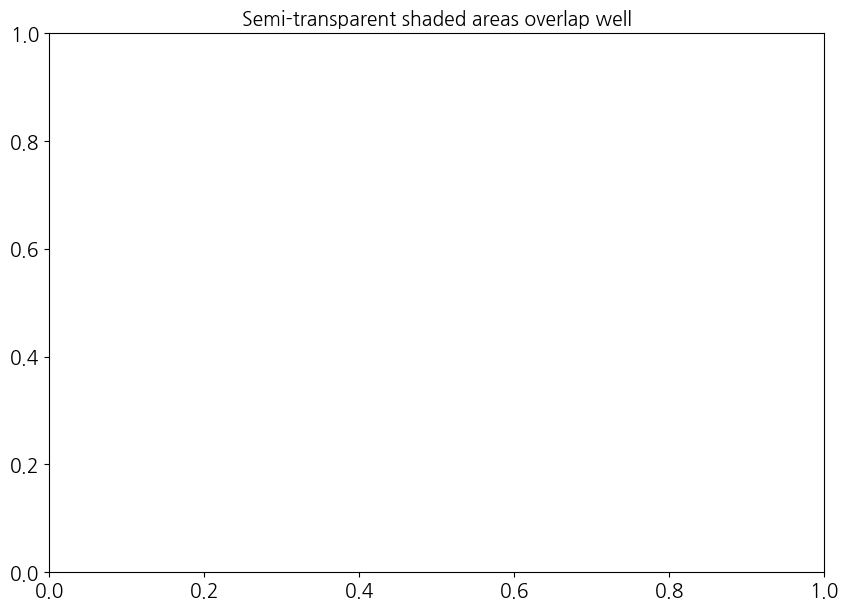

In [38]:
b= list(range(0, 101))
plt.rc('axes', labelsize=14,  titlesize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(10, 7))

ax3 = plt.subplot(111)
ax3.set_title('Semi-transparent shaded areas overlap well')
ax3.fill_between(b, typeAm+typeAsd, typeAm-typeAsd,facecolor=(0,0,1,.2),edgecolor=(0,0,1,.1), label="Vicon")

ax3.set_xlabel('Cycle [%]')
# fill_between() command creates a PolyCollection that is not supported by the legend()
ax3.legend()

ValueError: operands could not be broadcast together with shapes (101,) (0,) 

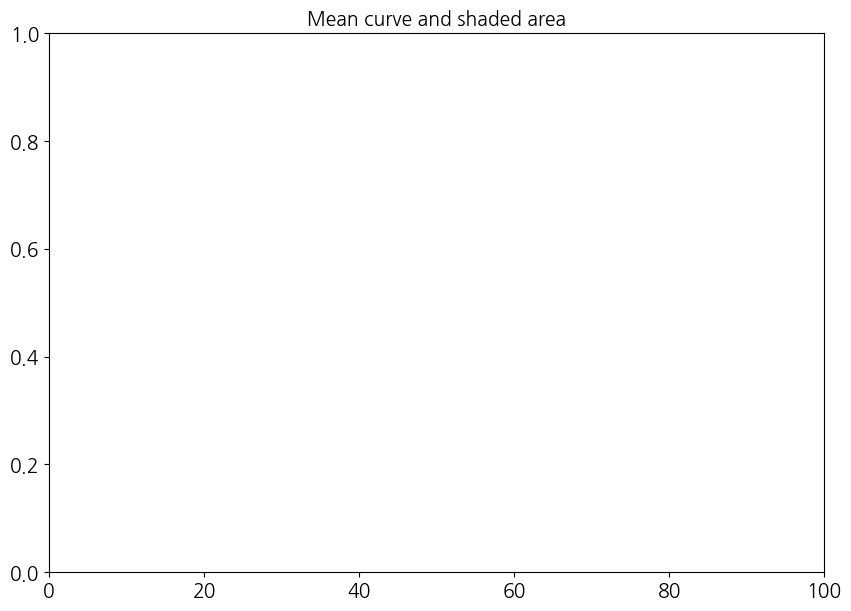

In [39]:
plt.rc('axes', labelsize=14,  titlesize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(10, 7))
plt.xlim([0,100])


ax2 = plt.subplot(111)
ax2.set_title('Mean curve and shaded area')
ax2.fill_between(b, typeAm+typeAsd, typeAm-typeAsd, color = [0, 0, 1, 0.2])
ax2.plot(b, typeAm, color = [0, 0, 1, .8], lw=2, label='Vicon')
ax2.legend(fontsize=14, loc='best', framealpha=.8)
ax2.grid()
ax2.set_xlabel("Time[%]")
ax2.set_ylabel("Degree")


plt.show()